In [1]:
import pickle
from collections import defaultdict
%run utils_rf

/home/joshua/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
with open('mae_results_ws_drop3.pkl','rb') as f:
    mae_results = pickle.load(f)

In [3]:
def get_summaries(results):
    scores = defaultdict(list)
    for i in range(10):
        for run in results[i]:
            score = results[i][run]['avg_score']
            features = results[i][run]['feature_names']
            scores[features].append(score)
    score_summaries = defaultdict(dict)
    for features in scores:
        score_summaries[features]['mean'] = np.mean(scores[features])
        score_summaries[features]['std'] = np.std(scores[features])
        score_summaries[features]['count'] = len(scores[features])
    return score_summaries

In [4]:
def find_best(results, n):
    score_summaries = get_summaries(results)
    best_dict = defaultdict(dict)
    for i in range(n):
        score_summaries_filtered = defaultdict(dict)
        for features in score_summaries:
            if score_summaries[features]['count']>i:
                score_summaries_filtered[features]=score_summaries[features]
        best = -1
        best_features = []
        for features in score_summaries_filtered:
            if score_summaries_filtered[features]['mean']>best:
                best = score_summaries_filtered[features]['mean']
                best_features = features
        best_dict[i + 1]['score'] = best
        best_dict[i + 1]['features'] = best_features
    return best_dict

In [5]:
find_best(mae_results,6)

defaultdict(dict,
            {1: {'score': -0.20909069044634868,
              'features': ('value.Operation Monitoring',
               'value.Quality Control Analysis',
               'value.Problem Sensitivity',
               'value.Perceptual Speed',
               'value.Control Precision',
               'value.Mechanical',
               'value.English Language',
               'value.Fine Arts',
               'value.Telecommunications')},
             2: {'score': -0.2419125707517888,
              'features': ('value.Writing',
               'value.Problem Sensitivity',
               'value.Speed of Closure',
               'value.Selective Attention',
               'value.Control Precision',
               'value.Personnel and Human Resources',
               'value.Geography',
               'value.Telecommunications')},
             3: {'score': -0.28181500598544423,
              'features': ('value.Problem Sensitivity',
               'value.Control Precision',
     

In [6]:
def find_best_in_run(results):
    best_dict = defaultdict(dict)
    
    for i in range(10):
        best = -1
        best_features = []
        for run in results[i]:
            score = results[i][run]['avg_score']
            features = results[i][run]['feature_names']
            if score>best:
                best=score
                best_features = features
        best_dict[i]['score'] = best
        best_dict[i]['features'] = best_features 
    return best_dict

In [7]:
run_bests = find_best_in_run(mae_results)
best_lens = []
for i in range(5):
    best_lens.append(len(run_bests[i]['features']))

In [8]:
run_bests

defaultdict(dict,
            {0: {'score': -0.2241706145664492,
              'features': ('value.Active Listening',
               'value.Monitoring',
               'value.Coordination',
               'value.Quality Control Analysis',
               'value.Management of Material Resources',
               'value.Management of Personnel Resources',
               'value.Perceptual Speed',
               'value.Spatial Orientation',
               'value.Control Precision',
               'value.Response Orientation',
               'value.Rate Control',
               'value.Night Vision',
               'value.Peripheral Vision',
               'value.Speech Recognition',
               'value.Personnel and Human Resources',
               'value.Food Production',
               'value.Geography',
               'value.English Language',
               'value.Fine Arts')},
             1: {'score': -0.20909069044634868,
              'features': ('value.Operation Monitoring',
     

(array([1., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([ 9. ,  9.8, 10.6, 11.4, 12.2, 13. , 13.8, 14.6, 15.4, 16.2, 17. ,
        17.8, 18.6, 19.4, 20.2, 21. , 21.8, 22.6, 23.4, 24.2, 25. ]),
 <a list of 20 Patch objects>)

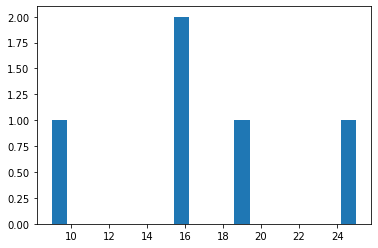

In [9]:
plt.hist(best_lens,bins=20)

In [15]:
performance = []
for i in range(20):
    feature_count_scores = np.zeros(30)
    for run in mae_results[i]:
        feature_count = len(mae_results[i][run]['feature_idx'])
        score = abs(mae_results[i][run]['avg_score'])
        if score > feature_count_scores[feature_count-1]:
            feature_count_scores[feature_count-1]=score
    performance.append(feature_count_scores)

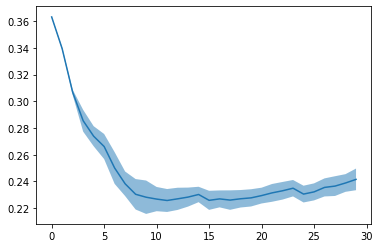

In [16]:
performance = pd.DataFrame(performance)
avg_score = performance.mean(axis=0)
std_score = performance.std(axis=0)
plt.plot(avg_score)
plt.fill_between(range(0,30),avg_score-std_score,avg_score+std_score,alpha=0.5)
plt.show()

In [17]:
#consitency in bests!
all_best_features = np.asarray(run_bests[0]['features'])
for i in range(1,20):
    new = np.asarray(run_bests[i]['features'])
    all_best_features = np.append(all_best_features,new)

KeyError: 'features'

In [13]:
unique, counts = np.unique(all_best_features, return_counts=True)
best_feature_counts = dict(zip(unique, counts))
pd.Series(best_feature_counts).sort_values(ascending=False)

value.Quality Control Analysis             9
value.Control Precision                    9
value.Telecommunications                   9
value.Perceptual Speed                     8
value.Fine Arts                            8
value.English Language                     8
value.Category Flexibility                 7
value.Geography                            5
value.Selective Attention                  5
value.Rate Control                         4
value.Monitoring                           4
value.Spatial Orientation                  4
value.Far Vision                           4
value.Speech Recognition                   4
value.Speed of Closure                     4
value.Critical Thinking                    4
value.Coordination                         4
value.Written Comprehension                4
value.Problem Sensitivity                  3
value.Peripheral Vision                    3
value.Personnel and Human Resources        3
value.Food Production                      3
value.Mech

In [14]:
chosen = ['value.Service Orientation',
               'value.Operations Analysis',
               'value.Technology Design',
               'value.Systems Analysis',
               'value.Problem Sensitivity',
               'value.Time Sharing',
               'value.Explosive Strength',
               'value.Personnel and Human Resources',
               'value.Computers and Electronics']

In [15]:
for feature in chosen:
    print(feature)
    print(best_feature_counts[feature])

value.Service Orientation
13
value.Operations Analysis
1
value.Technology Design
17
value.Systems Analysis
4
value.Problem Sensitivity
9
value.Time Sharing
15
value.Explosive Strength
16
value.Personnel and Human Resources
7
value.Computers and Electronics
19
